In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf_rf = RandomForestClassifier()

In [3]:
from sklearn.model_selection import GridSearchCV

parametrs =  {'n_estimators': [10,20,30],
              'max_depth': [2,5,7,10]}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [2]:
import pandas as pd
import numpy as np

np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)
data = pd.read_csv(
    'https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')

In [5]:
X = data.drop('target',axis=1)
y = data.target

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
grid_search_cv_clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [10]:
grid_search_cv_clf.best_params_

{'max_depth': 2, 'n_estimators': 30}

In [29]:
best_clf = clf_rf.fit(X, y)
best_clf.score(X, y)

1.0

In [30]:
feature_importances = best_clf.feature_importances_


In [31]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                      'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
7,thalach,0.128262
12,thal,0.119944
2,cp,0.119600
11,ca,0.109407
9,oldpeak,0.105420
0,age,0.081571
4,chol,0.081470
3,trestbps,0.073327
10,slope,0.059022
8,exang,0.057973


<AxesSubplot:>

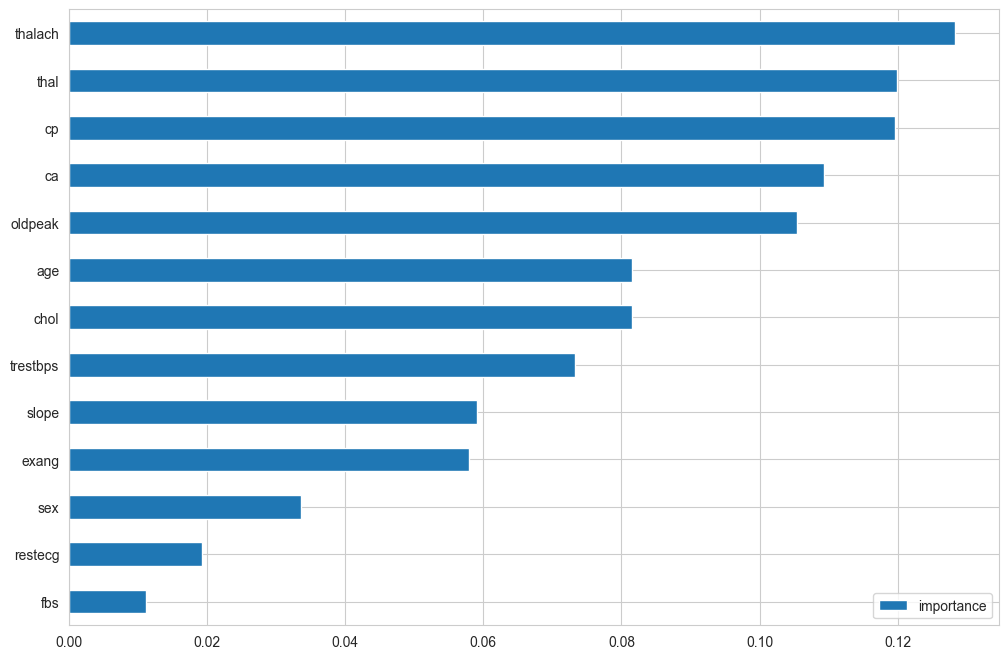

In [33]:
imp = pd.DataFrame(clf_rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))